# Table of Contents
>## 1. Notebook Imports
>## 2. Loading Data
>## 3. Exploratory Data Analysis and Preprocessing
>## 4. Modelling
>>### 4.1. K-Nearest Neighbors (KNN) Algorithm
>>### 4.2. Logistic Regression
>>### 4.3. Support Vector Machine (SVM)
>>### 4.4. Random Forest 
>>### 4.5. Gradient Boosting
>## 5.Model Evaluation
>## 6.Hyperparameter Optimization and an Ensemble Model

## 1. Notebook Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders
import category_encoders as ce

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

## 2. Loading Data

In [2]:
data=pd.read_csv('churn.csv')
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## 3. Exploratory Data Analysis and Preprocessing

In [3]:
data.shape

(5000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

In [5]:
print(data['state'].unique())
print(data['area_code'].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[415 408 510]


In [6]:
#Let's make 'area_code' column a categorical variable
data['area_code'] = data['area_code'].astype(object)

In [7]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

In [8]:
#column 'total_eve_charge' must be of type integer, 
#Moreover, there are "?" marked values in the column, let's make such missing data "NaN"

data['total_eve_charge'] = pd.to_numeric(data['total_eve_charge'], errors='coerce')
data['total_day_charge'] = pd.to_numeric(data['total_day_charge'], errors='coerce')
data['total_night_charge'] = pd.to_numeric(data['total_night_charge'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               4995 non-null   f

In [10]:
#Let's drop the rows containing NaN
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4994 non-null   object 
 1   account_length                 4994 non-null   int64  
 2   area_code                      4994 non-null   object 
 3   phone_number                   4994 non-null   object 
 4   intl_plan                      4994 non-null   object 
 5   voice_mail_plan                4994 non-null   object 
 6   number_vmail_messages          4994 non-null   int64  
 7   total_day_minutes              4994 non-null   float64
 8   total_day_calls                4994 non-null   int64  
 9   total_day_charge               4994 non-null   float64
 10  total_eve_minutes              4994 non-null   float64
 11  total_eve_calls                4994 non-null   int64  
 12  total_eve_charge               4994 non-null   f

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4994.0,100.254505,39.697205,1.0,73.0000,100.00,127.000,243.00
number_vmail_messages,4994.0,7.746896,13.542214,0.0,0.0000,0.00,17.000,52.00
total_day_minutes,4994.0,180.271746,53.910127,0.0,143.7000,180.10,216.200,351.50
total_day_calls,4994.0,100.024630,19.837170,0.0,87.0000,100.00,113.000,165.00
total_day_charge,4994.0,30.646752,9.164692,0.0,24.4300,30.62,36.750,59.76
total_eve_minutes,4994.0,200.608771,50.567364,0.0,166.2250,201.00,234.100,363.70
total_eve_calls,4994.0,100.195435,19.834218,0.0,87.0000,100.00,114.000,170.00
total_eve_charge,4994.0,17.051960,4.298210,0.0,14.1325,17.09,19.900,30.91
total_night_minutes,4994.0,200.343272,50.517743,0.0,166.8250,200.25,234.675,395.00
total_night_calls,4994.0,99.908290,19.961318,0.0,87.0000,100.00,113.000,175.00


In [13]:
data.describe(include='O').T

,count,unique,top,freq
state,4994,51,WV,157
area_code,4994,3,415,2492
phone_number,4994,4994,382-4657,1
intl_plan,4994,2,no,4523
voice_mail_plan,4994,2,no,3674
churned,4994,2,False.,4287


In [14]:
#Let's delete column 'phone_number', it's unnecessary for our analysis
data.drop(['phone_number'], axis=1, inplace=True)

In [15]:
data

,state,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,WV,152,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,DC,61,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.


In [16]:
#Let's look at the number of the target variable
data['churned'].value_counts()

 False.    4287
 True.      707
Name: churned, dtype: int64

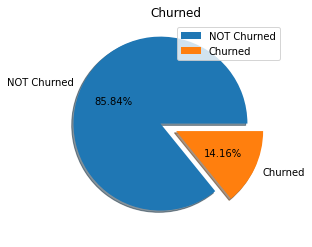

In [17]:
explode = [0.2, 0]
labels = ["NOT Churned", "Churned"]
plt.pie(data['churned'].value_counts(), labels = labels, explode = explode, shadow=True, autopct='%1.2f%%')
plt.title("Churned")
plt.legend()
plt.show()

In [18]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

state : ['KS', 'NJ', 'OH', 'OK', 'MA', 'MO', 'LA', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'WV', 'KY', 'ME', 'MS', 'AL', 'FL', 'TN', 'PA', 'CT', 'ND']
area_code : [415, 408, 510]
intl_plan : [' no', ' yes']
voice_mail_plan : [' yes', ' no']
churned : [' False.', ' True.']


In [19]:
#State column has 51 different categories so it leads to overfitting and it will be used as the hashing encoding for the state feature.
state_hashing = ce.HashingEncoder(cols='state')
data = state_hashing.fit_transform(data)

In [20]:
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
6,0,0,0,0,1,0,0,0,121,510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,1,0,50,408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,0,0,0,0,0,0,1,0,152,415,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,0,0,0,1,0,0,0,0,61,415,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,0,0,0,1,0,0,0,0,109,510,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4994 non-null   int64  
 1   col_1                          4994 non-null   int64  
 2   col_2                          4994 non-null   int64  
 3   col_3                          4994 non-null   int64  
 4   col_4                          4994 non-null   int64  
 5   col_5                          4994 non-null   int64  
 6   col_6                          4994 non-null   int64  
 7   col_7                          4994 non-null   int64  
 8   account_length                 4994 non-null   int64  
 9   area_code                      4994 non-null   object 
 10  intl_plan                      4994 non-null   object 
 11  voice_mail_plan                4994 non-null   object 
 12  number_vmail_messages          4994 non-null   i

Creating the target and feature variables

In [22]:
y= data.churned
X= data.drop(["churned"], axis=1)

Splitting the data into train and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3745, 26), (1249, 26), (3745,), (1249,))

Handling the categorical and numerical columns

In [25]:
categorical_cols= [cname for cname in X_train.columns 
                   if X_train[cname].dtype=="object"]

In [26]:
categorical_cols

['area_code', 'intl_plan', 'voice_mail_plan']

In [27]:
numerical_cols= [cname for cname in X_train.columns 
                   if X_train[cname].dtype in ["int64", "float"]]

In [28]:
numerical_cols

['col_0',
 'col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [29]:
totalcolumns=categorical_cols+numerical_cols

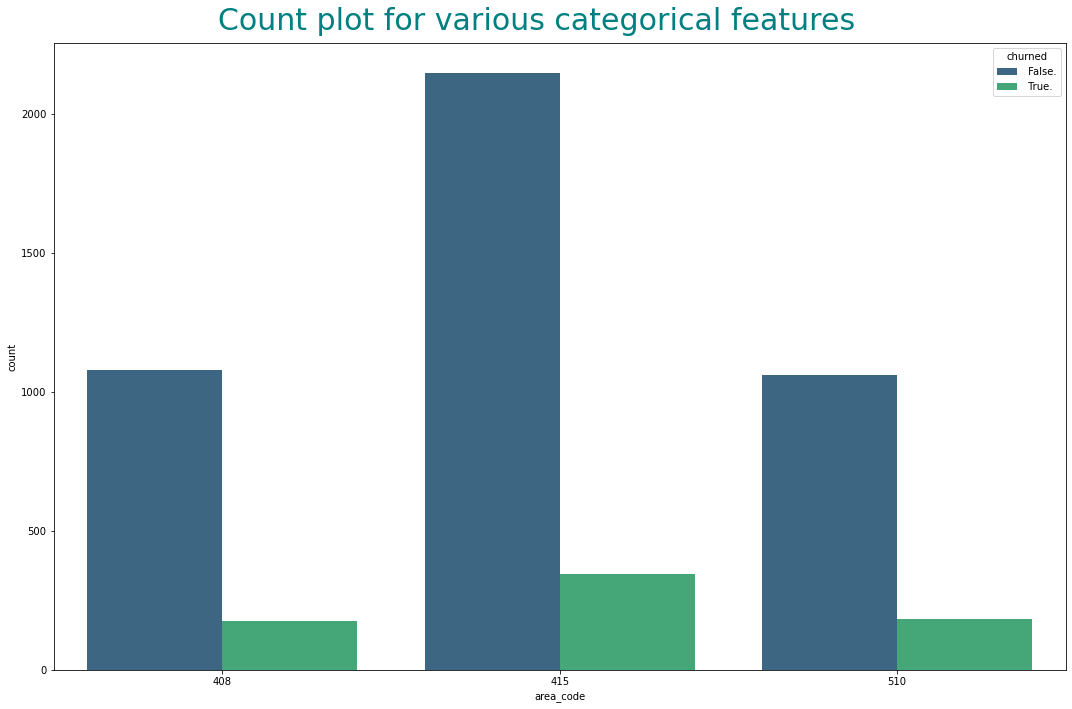

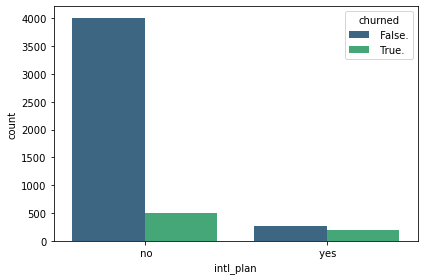

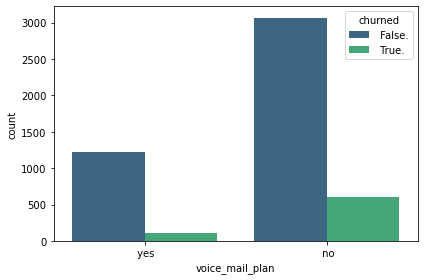

In [30]:
fig, ax = plt.subplots(len(categorical_cols)-2, 1, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

for i in categorical_cols:
    ax= sns.countplot(x =data[i], hue= data['churned'], palette= 'viridis')
    ax.set(xlabel = i)
    plt.tight_layout()
    plt.show()

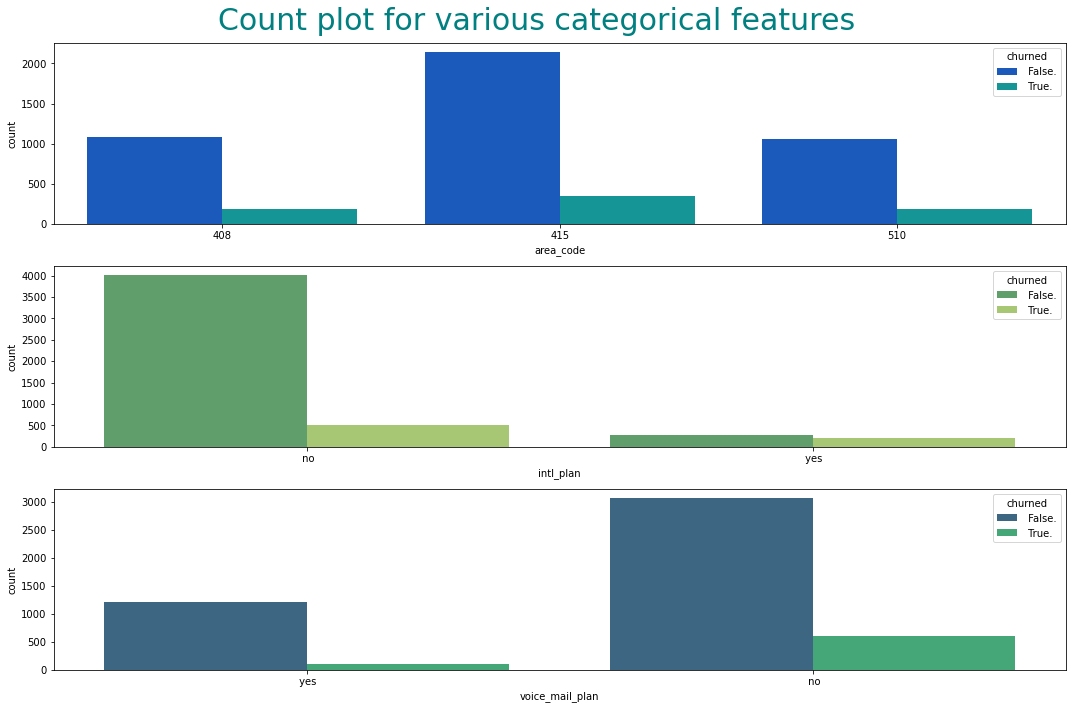

In [32]:
fig, ax = plt.subplots(3, 1, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

"""ax1 = sns.countplot(x ='state', data= data, hue= 'churned', ax= ax[0], palette= 'spring')
ax1.set(xlabel = 'state')"""

ax2 = sns.countplot(x ='area_code', data= data, hue= 'churned', ax= ax[0], palette= 'winter')
ax2.set(xlabel = 'area_code')

ax3 = sns.countplot(x ='intl_plan', data= data, hue= 'churned', ax= ax[1], palette= 'summer')
ax3.set(xlabel = 'intl_plan')

ax4 = sns.countplot(x ='voice_mail_plan', data= data, hue= 'churned', ax= ax[2], palette= 'viridis')
ax4.set(xlabel = 'voice_mail_plan')

plt.tight_layout()
plt.show()

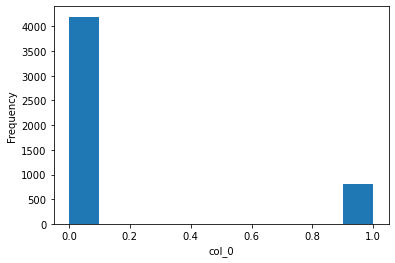

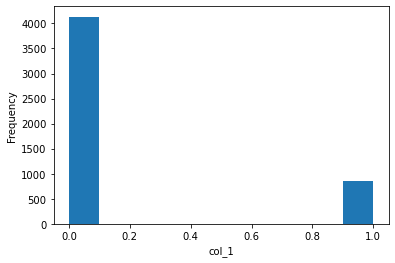

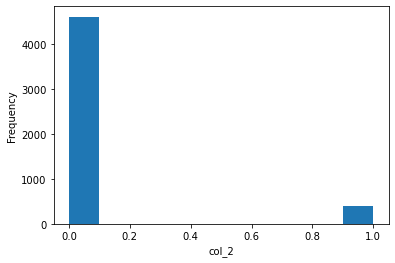

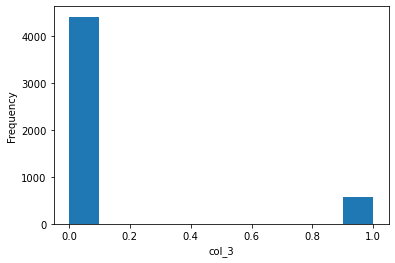

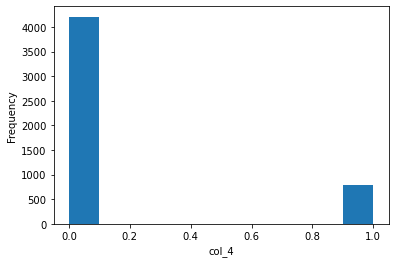

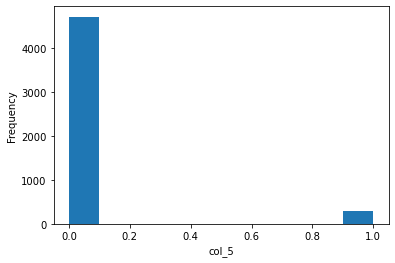

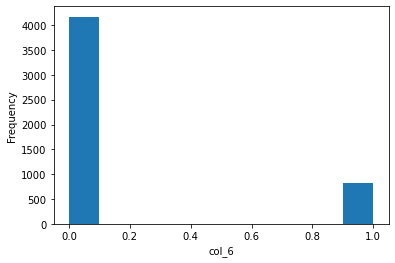

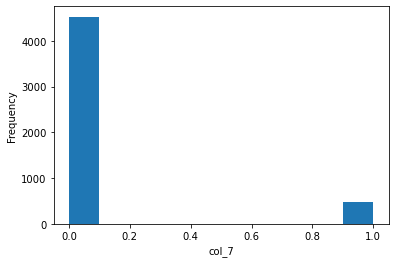

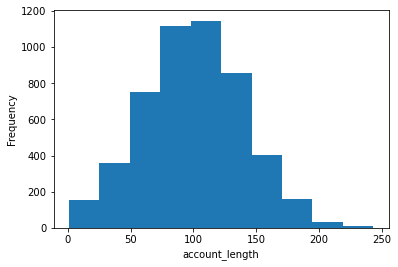

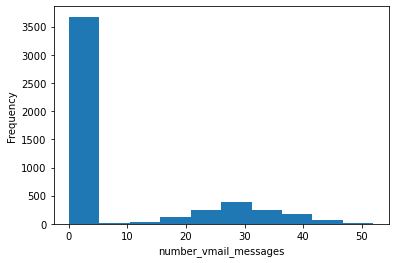

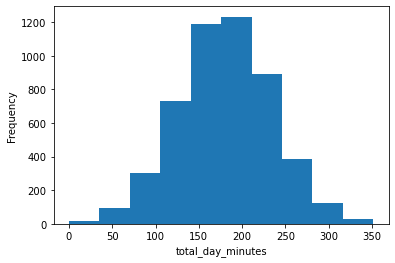

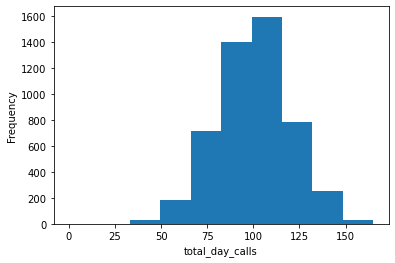

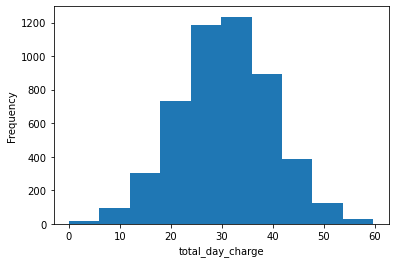

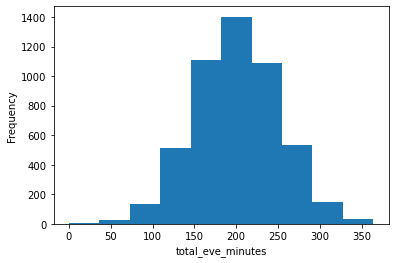

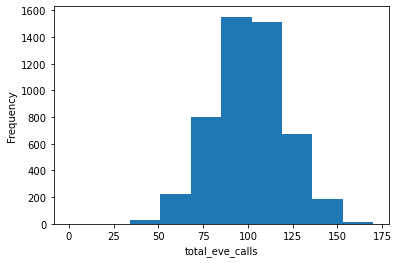

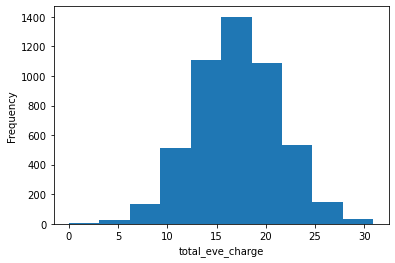

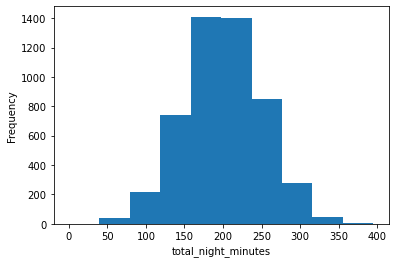

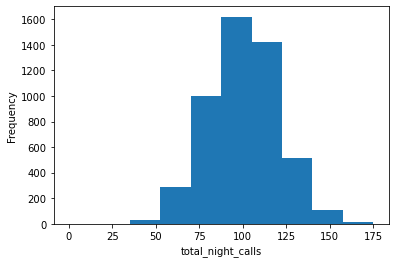

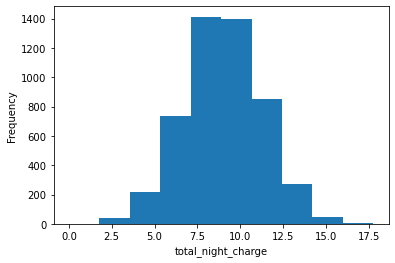

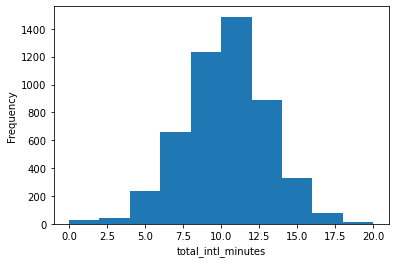

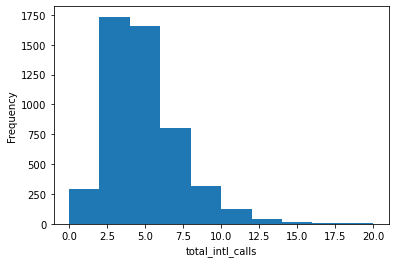

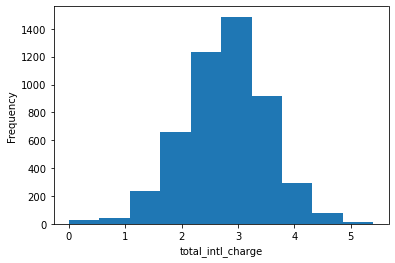

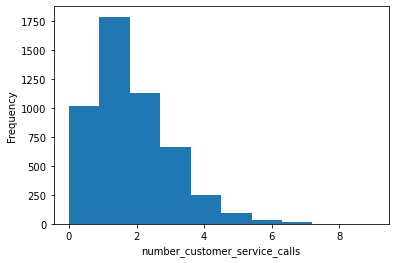

In [33]:
for i in numerical_cols:
    plt.figure()
    plt.tight_layout()
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    
    plt.hist(data[i])

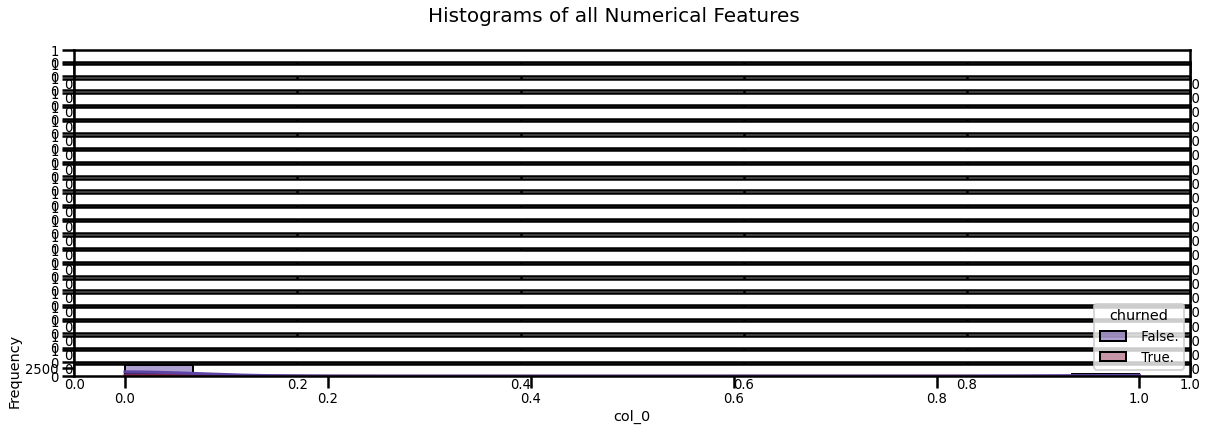

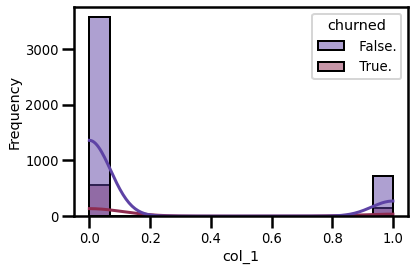

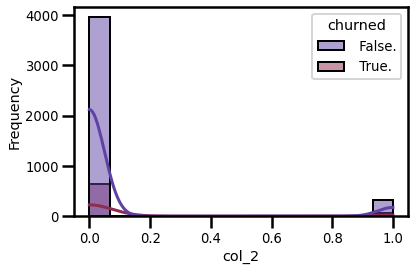

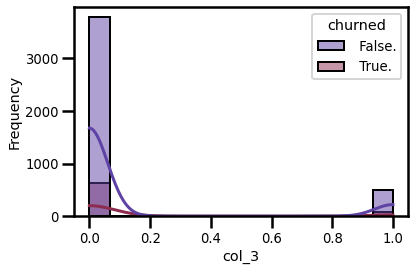

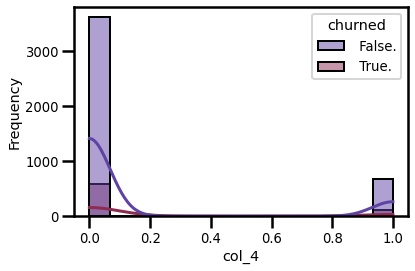

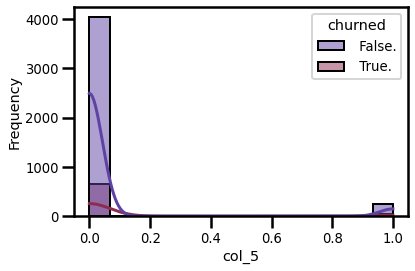

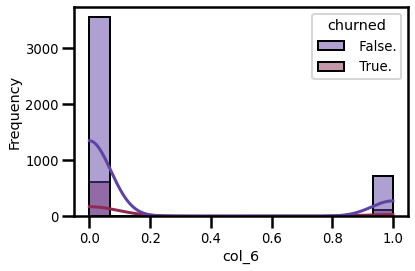

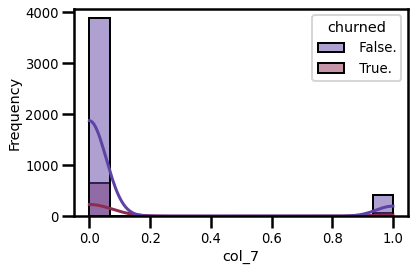

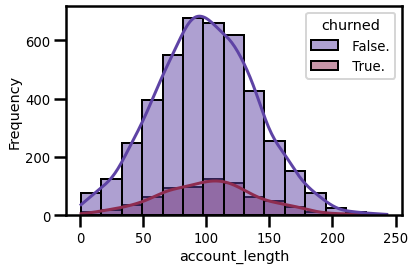

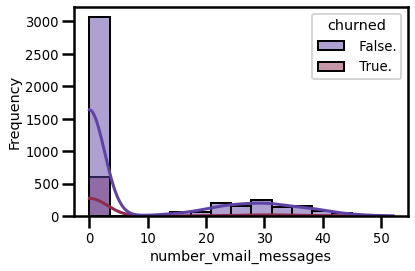

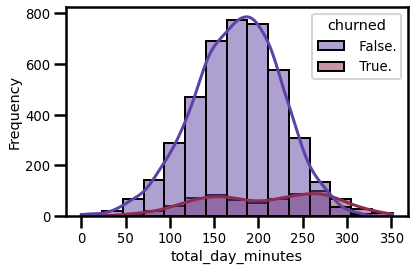

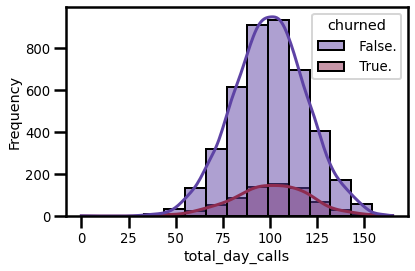

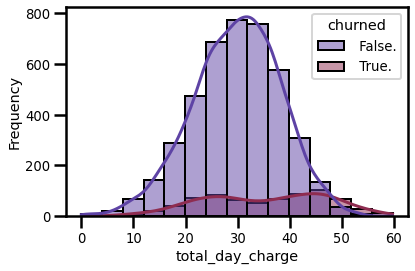

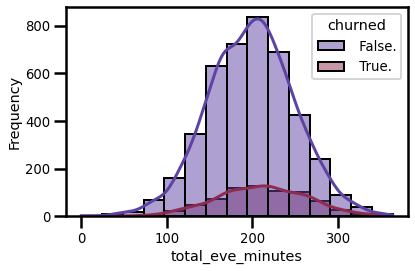

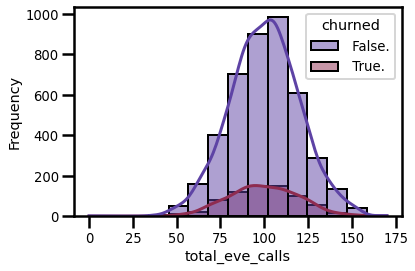

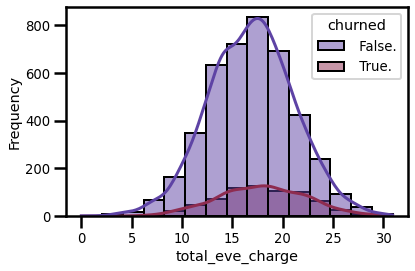

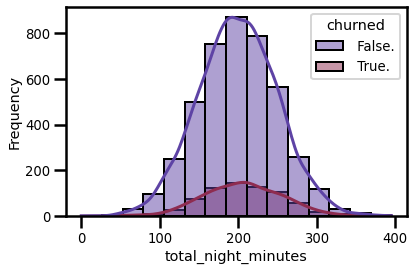

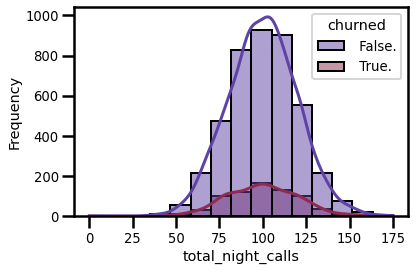

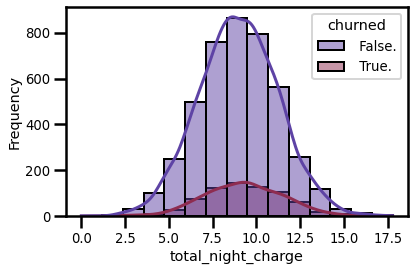

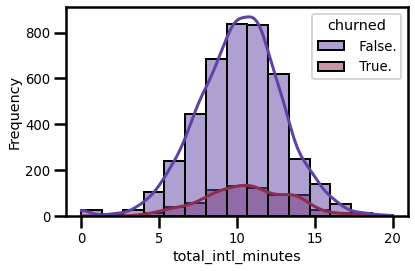

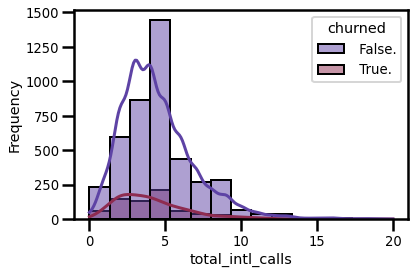

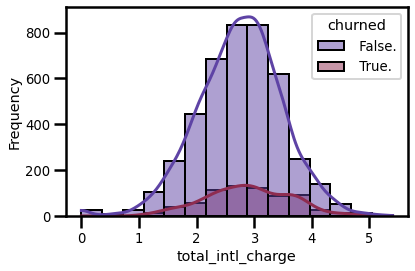

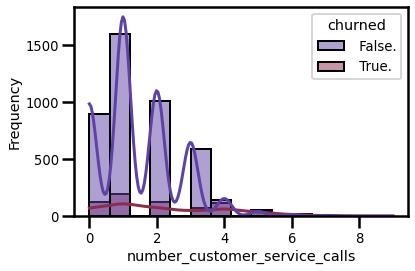

In [34]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(len(numerical_cols), 1, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

for i in numerical_cols:
    ax=sns.histplot(x = data[i],color= 'teal', hue= data['churned'], bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')
    
    plt.tight_layout()
    plt.show()

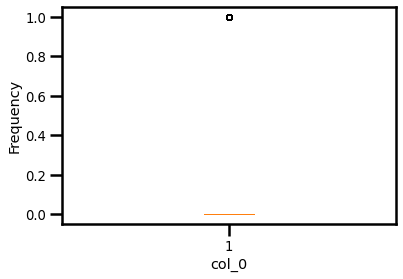

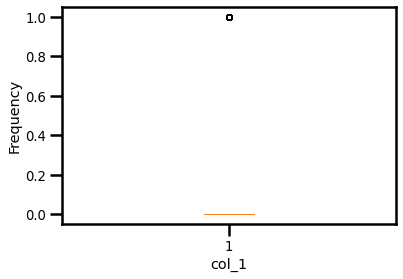

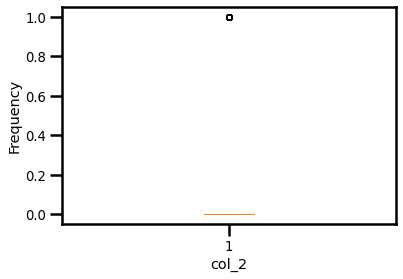

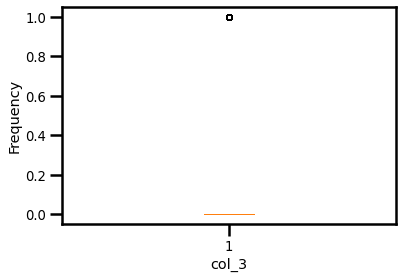

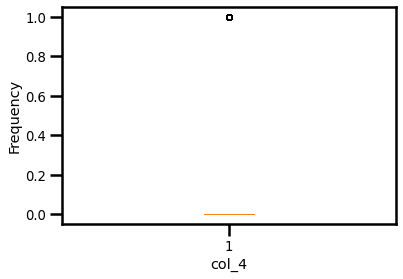

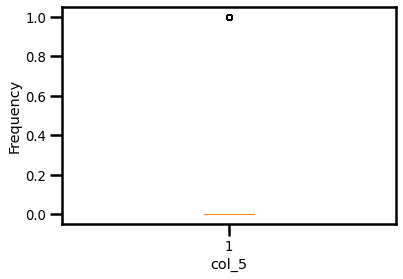

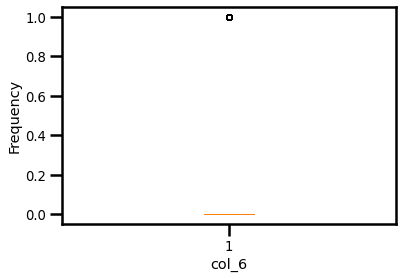

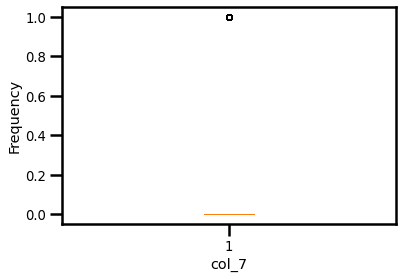

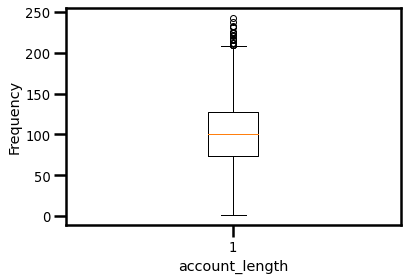

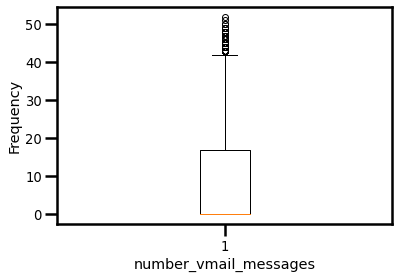

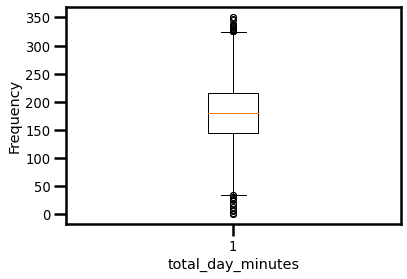

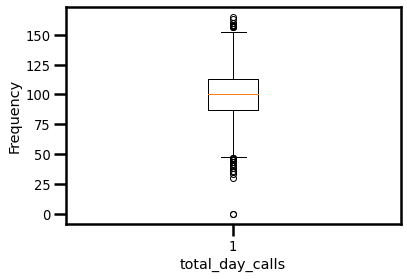

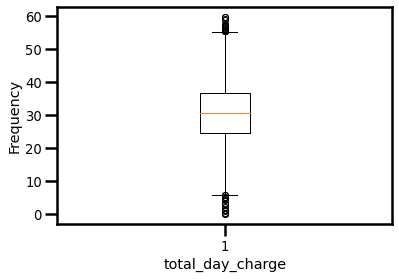

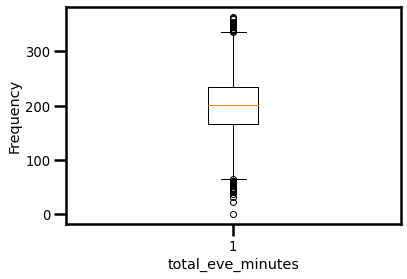

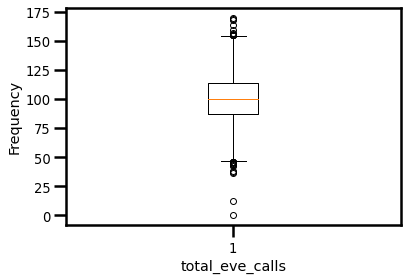

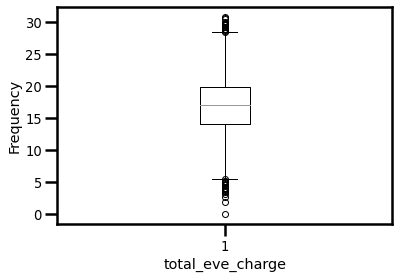

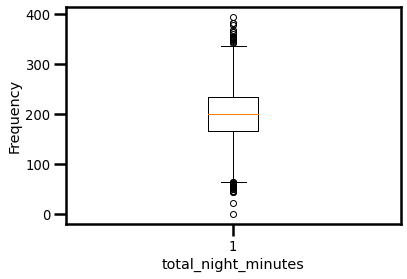

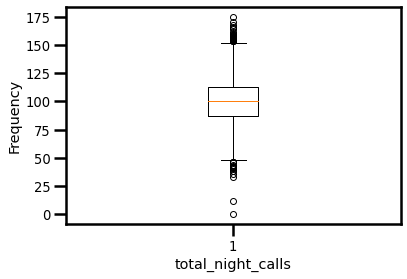

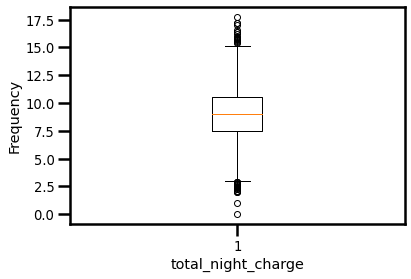

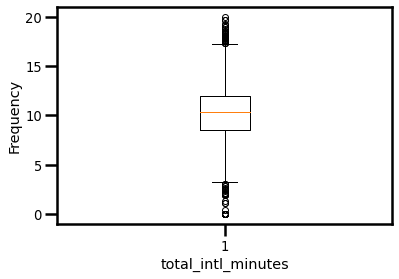

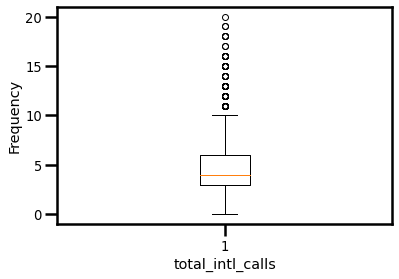

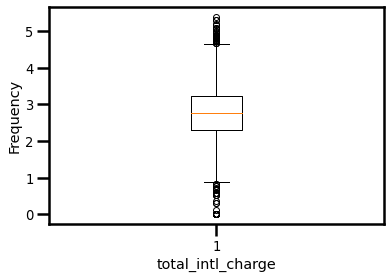

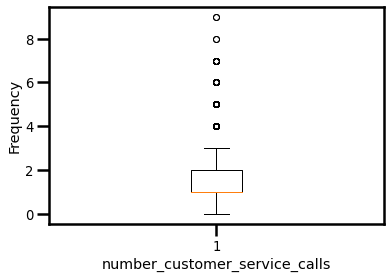

In [35]:
for i in numerical_cols:
    plt.figure()
    plt.tight_layout()
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    plt.boxplot(data[i])    

Pipelines for data preprocessing

In [36]:
#pipeline for numerical columns to handle missing data and scale data.

numerical_transformers= Pipeline(steps=[
    ("imputer_num", SimpleImputer(strategy="median")), #eksik verileri nasıl ele alacağımız belirttik
    ("scaler", StandardScaler())
])

In [37]:
#pipeline for categorical columns to handle missing data and perform one-hot encoding.
categorical_transformers= Pipeline(steps=[
    ("imputer_cal", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")) #kategorik verileri sayısala çevirelim
] )

In [38]:
#Let's apply these transformers to categorical and numerical columns.
preprocessor= ColumnTransformer(transformers=[
    ("num", numerical_transformers, numerical_cols),
    ("cat", categorical_transformers, categorical_cols)
])

let's look at the correlations before we build the models

In [39]:
encoded = data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0,1,0,0,0,0,0,0,128,1,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,0,0,0,0,0,0,137,1,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,0,0,0,1,0,0,0,84,0,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,0,0,0,1,0,0,0,75,1,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
6,0,0,0,0,1,0,0,0,121,2,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [40]:
for i in encoded.columns:
    cor_x=encoded[i]
    cor_y=encoded['churned']
    print(i,":", cor_x.corr(cor_y)*100)

col_0 : -3.464947388109442
col_1 : 4.098803249518193
col_2 : 1.5494608732988133
col_3 : -0.8171475903890526
col_4 : 0.8348876146560604
col_5 : 1.989222647426767
col_6 : -2.2676411176180853
col_7 : -1.2327890385385532
account_length : 2.1258764407605173
area_code : 0.7059239938044383
intl_plan : 26.005532632570915
voice_mail_plan : -11.055318183282514
number_vmail_messages : -9.74827798758468
total_day_minutes : 20.792026801905006
total_day_calls : 1.623380297536767
total_day_charge : 20.791481974954905
total_eve_minutes : 8.954578480832495
total_eve_calls : -0.6376824268212635
total_eve_charge : 8.953945050225517
total_night_minutes : 4.610646655546488
total_night_calls : -0.6767575341622938
total_night_charge : 4.61029709970933
total_intl_minutes : 6.321497744013828
total_intl_calls : -4.688858411205797
total_intl_charge : 6.320471591095424
number_customer_service_calls : 21.240013642229368
churned : 100.0


## 4. Modelling

>### 4.1. K-Nearest Neighbors (KNN) Algorithm

In [41]:
knn= KNeighborsClassifier()

In [42]:
KNN_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", knn)
])

In [43]:
KNN_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [44]:
print(KNN_pipeline.score(X_train,y_train))
print(KNN_pipeline.score(X_test,y_test))

0.8947930574098798
0.8831064851881505


In [45]:
KNN_predictions= KNN_pipeline.predict(X_test)

In [46]:
KNN_score = round(accuracy_score(y_test, KNN_predictions), 3)
KNN_score

0.883

In [47]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

      False.       0.88      0.99      0.94      1072
       True.       0.86      0.21      0.34       177

    accuracy                           0.88      1249
   macro avg       0.87      0.60      0.64      1249
weighted avg       0.88      0.88      0.85      1249



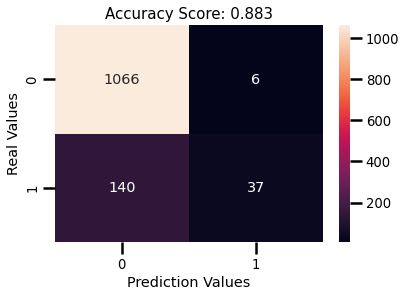

In [48]:
KNN_predictions= KNN_pipeline.predict(X_test)
KNN_score = round(accuracy_score(y_test, KNN_predictions), 3)
KNN_confusionMatrix = CM(y_test, KNN_predictions)
sns.heatmap(KNN_confusionMatrix, annot=True, fmt=".0f")
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')
plt.title('Accuracy Score: {0}'.format(KNN_score), size = 15)
plt.show()

In [49]:
KNN_predict= KNN_pipeline.predict_proba(X_test)
KNN_predict

array([[0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

In [50]:
KNN_predict = KNN_predict[:, 1]
KNN_predict

array([0.2, 0. , 0.4, ..., 0. , 0. , 0.2])

In [51]:
KNN_recall= roc_auc_score(y_test, KNN_predict)
KNN_recall

0.7614074753351885

>### 4.2. Logistic Regression

In [52]:
lr= LogisticRegression(random_state=0)

In [53]:
LR_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lr)
])

In [54]:
LR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [55]:
print(LR_pipeline.score(X_train,y_train))
print(LR_pipeline.score(X_test,y_test))

0.8651535380507344
0.8702962369895917


In [56]:
LR_predictions= LR_pipeline.predict(X_test)

In [57]:
LR_score = round(accuracy_score(y_test, LR_predictions), 3)
LR_score

0.87

In [58]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

      False.       0.89      0.97      0.93      1072
       True.       0.61      0.24      0.34       177

    accuracy                           0.87      1249
   macro avg       0.75      0.61      0.63      1249
weighted avg       0.85      0.87      0.84      1249



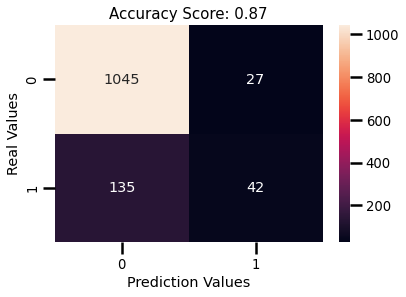

In [59]:
LR_predictions= LR_pipeline.predict(X_test)
LR_score = round(accuracy_score(y_test, LR_predictions), 3)
LR_confusionMatrix = CM(y_test, LR_predictions)
sns.heatmap(LR_confusionMatrix, annot=True, fmt=".0f")
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')
plt.title('Accuracy Score: {0}'.format(LR_score), size = 15)
plt.show()

In [60]:
LR_predict= LR_pipeline.predict_proba(X_test)
LR_predict

array([[0.98104641, 0.01895359],
       [0.94222067, 0.05777933],
       [0.73305576, 0.26694424],
       ...,
       [0.80666956, 0.19333044],
       [0.94671554, 0.05328446],
       [0.80558635, 0.19441365]])

In [61]:
LR_predict = LR_predict[:, 1]
LR_predict

array([0.01895359, 0.05777933, 0.26694424, ..., 0.19333044, 0.05328446,
       0.19441365])

In [62]:
LR_recall= roc_auc_score(y_test, LR_predict)
LR_recall

0.8273357787334514

>### 4.3. Support Vector Machine (SVM)

In [63]:
svm= SVC(probability=True, random_state=0)

In [64]:
SVM_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", svm)
])

In [65]:
SVM_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [66]:
print(SVM_pipeline.score(X_train,y_train))
print(SVM_pipeline.score(X_test,y_test))

0.9388518024032043
0.9199359487590072


In [67]:
SVM_predictions= SVM_pipeline.predict(X_test)

In [68]:
SVM_score = round(accuracy_score(y_test, SVM_predictions), 3)
SVM_score

0.92

In [69]:
print(classification_report(y_test, SVM_predictions))

              precision    recall  f1-score   support

      False.       0.92      1.00      0.96      1072
       True.       0.94      0.46      0.62       177

    accuracy                           0.92      1249
   macro avg       0.93      0.73      0.79      1249
weighted avg       0.92      0.92      0.91      1249



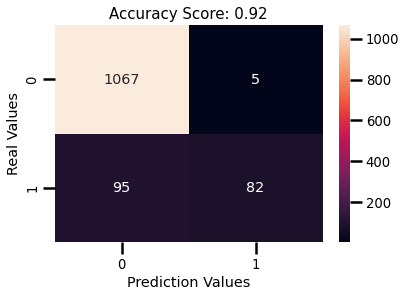

In [70]:
SVM_predictions= SVM_pipeline.predict(X_test)
SVM_score = round(accuracy_score(y_test, SVM_predictions), 3)
SVM_confusionMatrix = CM(y_test, SVM_predictions)
sns.heatmap(SVM_confusionMatrix, annot=True, fmt=".0f")
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')
plt.title('Accuracy Score: {0}'.format(SVM_score), size = 15)
plt.show()

In [71]:
SVM_predict= SVM_pipeline.predict_proba(X_test)
SVM_predict

array([[0.99540986, 0.00459014],
       [0.99694717, 0.00305283],
       [0.00655602, 0.99344398],
       ...,
       [0.95046561, 0.04953439],
       [0.98102427, 0.01897573],
       [0.97462008, 0.02537992]])

In [72]:
SVM_predict = SVM_predict[:, 1]
SVM_predict

array([0.00459014, 0.00305283, 0.99344398, ..., 0.04953439, 0.01897573,
       0.02537992])

In [73]:
SVM_recall= roc_auc_score(y_test, SVM_predict)
SVM_recall

0.9044080445231469

>### 4.4. Random Forest 


In [74]:
rf= RandomForestClassifier(max_depth=10, random_state=0)

In [75]:
RF_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
])

In [76]:
RF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [77]:
print(RF_pipeline.score(X_train,y_train))
print(RF_pipeline.score(X_test,y_test))

0.9762349799732978
0.9503602882305845


In [78]:
RF_predictions= RF_pipeline.predict(X_test)

In [79]:
RF_score = round(accuracy_score(y_test, RF_predictions), 3)
RF_score

0.95

In [80]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

      False.       0.95      0.99      0.97      1072
       True.       0.95      0.68      0.80       177

    accuracy                           0.95      1249
   macro avg       0.95      0.84      0.88      1249
weighted avg       0.95      0.95      0.95      1249



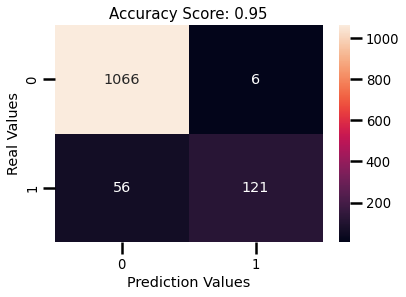

In [81]:
RF_predictions= RF_pipeline.predict(X_test)
RF_score = round(accuracy_score(y_test, RF_predictions), 3)
RF_confusionMatrix = CM(y_test, RF_predictions)
sns.heatmap(RF_confusionMatrix, annot=True, fmt=".0f")
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')
plt.title('Accuracy Score: {0}'.format(RF_score), size = 15)
plt.show()

In [82]:
RF_predict= RF_pipeline.predict_proba(X_test)
RF_predict

array([[0.96910555, 0.03089445],
       [0.96697691, 0.03302309],
       [0.28400001, 0.71599999],
       ...,
       [0.93831747, 0.06168253],
       [0.8949766 , 0.1050234 ],
       [0.94584852, 0.05415148]])

In [83]:
RF_predict = RF_predict[:, 1]
RF_predict

array([0.03089445, 0.03302309, 0.71599999, ..., 0.06168253, 0.1050234 ,
       0.05415148])

In [84]:
RF_recall= roc_auc_score(y_test, RF_predict)
RF_recall

0.9321137954296317

>### 4.5. Gradient Boosting

In [85]:
gb= GradientBoostingClassifier(random_state=0)

In [86]:
GB_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", gb)
])

In [87]:
GB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [88]:
print(GB_pipeline.score(X_train,y_train))
print(GB_pipeline.score(X_test,y_test))

0.9682242990654205
0.9511609287429944


In [89]:
GB_predictions= GB_pipeline.predict(X_test)

In [90]:
GB_score = round(accuracy_score(y_test, GB_predictions), 3)
GB_score

0.951

In [91]:
print(classification_report(y_test, GB_predictions))

              precision    recall  f1-score   support

      False.       0.95      0.99      0.97      1072
       True.       0.92      0.72      0.81       177

    accuracy                           0.95      1249
   macro avg       0.94      0.85      0.89      1249
weighted avg       0.95      0.95      0.95      1249



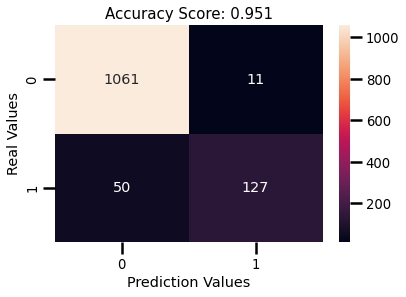

In [92]:
GB_predictions= GB_pipeline.predict(X_test)
GB_score = round(accuracy_score(y_test, GB_predictions), 3)
GB_confusionMatrix = CM(y_test, GB_predictions)
sns.heatmap(GB_confusionMatrix, annot=True, fmt=".0f")
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')
plt.title('Accuracy Score: {0}'.format(GB_score), size = 15)
plt.show()

In [93]:
GB_predict= GB_pipeline.predict_proba(X_test)
GB_predict

array([[0.97869522, 0.02130478],
       [0.97505131, 0.02494869],
       [0.08660346, 0.91339654],
       ...,
       [0.97055469, 0.02944531],
       [0.97590892, 0.02409108],
       [0.97236345, 0.02763655]])

In [94]:
GB_predict = GB_predict[:, 1]
GB_predict

array([0.02130478, 0.02494869, 0.91339654, ..., 0.02944531, 0.02409108,
       0.02763655])

In [95]:
GB_recall= roc_auc_score(y_test, GB_predict)
GB_recall

0.928725018972932

## 5.Model Evaluation

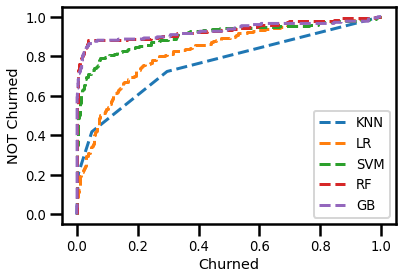

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import make_classification


y_Ttest = y_test.map({' True.': 1, ' False.': 0}).astype('int', errors='ignore')


KNN_fpr, KNN_tpr, _ = roc_curve(y_Ttest, KNN_predict)
LR_fpr, LR_tpr, _ = roc_curve(y_Ttest, LR_predict)
SVM_fpr, SVM_tpr, _ = roc_curve(y_Ttest, SVM_predict)
RF_fpr, RF_tpr, _ = roc_curve(y_Ttest, RF_predict)
GB_fpr, GB_tpr, _ = roc_curve(y_Ttest, GB_predict)


pyplot.plot(KNN_fpr, KNN_tpr, linestyle='--', label='KNN')
pyplot.plot(LR_fpr, LR_tpr, linestyle='--', label='LR')
pyplot.plot(SVM_fpr, SVM_tpr, linestyle='--', label='SVM')
pyplot.plot(RF_fpr, RF_tpr, linestyle='--', label='RF')
pyplot.plot(GB_fpr, GB_tpr, linestyle='--', label='GB')


pyplot.xlabel('Churned')
pyplot.ylabel('NOT Churned')

pyplot.legend()
pyplot.show()

In [99]:
#AUC Scores

print('KNN: ', KNN_recall)
print('LR: ', LR_recall)
print('SVM: ', SVM_recall)
print('RF: ', RF_recall)
print('GB: ', GB_recall)

KNN:  0.7614074753351885
LR:  0.8273357787334514
SVM:  0.9044080445231469
RF:  0.9321137954296317
GB:  0.928725018972932


In [107]:
#Accuracy scores


print('KNN: ', format(KNN_score,".3f"))
print('LR: ', format(LR_score,".3f"))
print('SVM: ', format(SVM_score,".3f"))
print('RF: ', format(RF_score,".3f"))
print('GB: ', format(GB_score,".3f"))

KNN:  0.883
LR:  0.870
SVM:  0.920
RF:  0.950
GB:  0.951


## 6.Hyperparameter Optimization and an Ensemble Model

Hyperparameter optimization will be performed for the 2 models that make the most successful predictions and an ensemble model will be created with that hyperparameters

_Hyperparameter Optimization for Random Forest_

In [108]:
RF_param_grid = { 
    'model__n_estimators': [100, 200, 300],
    'model__max_features': ['auto','log2'],
    'model__max_depth' : [5,15]}
RF_GridCV = GridSearchCV(RF_pipeline, RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)

{'model__max_depth': 15, 'model__max_features': 'auto', 'model__n_estimators': 100}
0.9506008010680909


_Hyperparameter Optimization for Gradient Boosting_

In [109]:
GB_param_grid = { 
    'model__n_estimators': [100, 200, 300],
    'model__max_features': ['auto','log2'],
    'model__max_depth' : [2,8]}
GB_GridCV = GridSearchCV(GB_pipeline, GB_param_grid, cv=5, n_jobs= -1)
GB_GridCV.fit(X_train,y_train)  
print(GB_GridCV.best_params_)    
print(GB_GridCV.best_score_)

{'model__max_depth': 8, 'model__max_features': 'log2', 'model__n_estimators': 300}
0.9538050734312418


__An Ensemble Model__

In [110]:
Ens_gb= GradientBoostingClassifier(max_depth=8, max_features='log2', n_estimators= 300, random_state=0)

In [111]:
Ens_rf= RandomForestClassifier(max_depth=15, max_features= 'auto', n_estimators= 100, random_state=0)

In [112]:
named_estimators= [("gb", Ens_gb), ("rf", Ens_rf)]

In [113]:
voting=VotingClassifier(named_estimators)

In [114]:
ENS_pipeline= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", voting)
])

In [115]:
ENS_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_4', 'col_5',
                                                   'col_6', 'col_7',
                                                   'account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                 

In [116]:
ENS_pipeline.score(X_test, y_test)

0.9543634907926342

It is possible to predict customer loss by using various analyzes and thus to warn the business before customer loss occurs.

The most appropriate algorithm chosen for the data we analyzed is Gradient Boosting.

As a result of our gradient boosting analysis, we achieved a successful prediction score of 95.12%.

The prediction score is 95,43% in the ensemble model designated with the best hyperparameters.